In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data=pd.read_csv('/content/iris (1).csv')
data.shape

(150, 5)

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [ ]:
data.isnull().sum().sum()

np.int64(0)

In [ ]:
print(data.duplicated().sum())

3


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(147, 5)

In [ ]:
data.target.unique()

array([0, 1, 2])

In [ ]:
X=data.iloc[:,[0,1,2,3]]
y=data[['target']]

In [ ]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 10)

In [ ]:
X_train.shape

(110, 4)

In [ ]:
y_train.shape

(110, 1)

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.9459459459459459

In [ ]:
model.get_depth()

4

In [ ]:
model = DecisionTreeClassifier(max_depth=3) # max.depth
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.918918918918919

In [ ]:
model = DecisionTreeClassifier(max_depth=10) # max.depth
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.9459459459459459

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      1.00      0.93        14
           2       1.00      0.83      0.91        12

    accuracy                           0.95        37
   macro avg       0.96      0.94      0.95        37
weighted avg       0.95      0.95      0.95        37



In [ ]:
confusion_matrix(y_test,y_predict)

array([[11,  0,  0],
       [ 0, 14,  0],
       [ 0,  2, 10]])

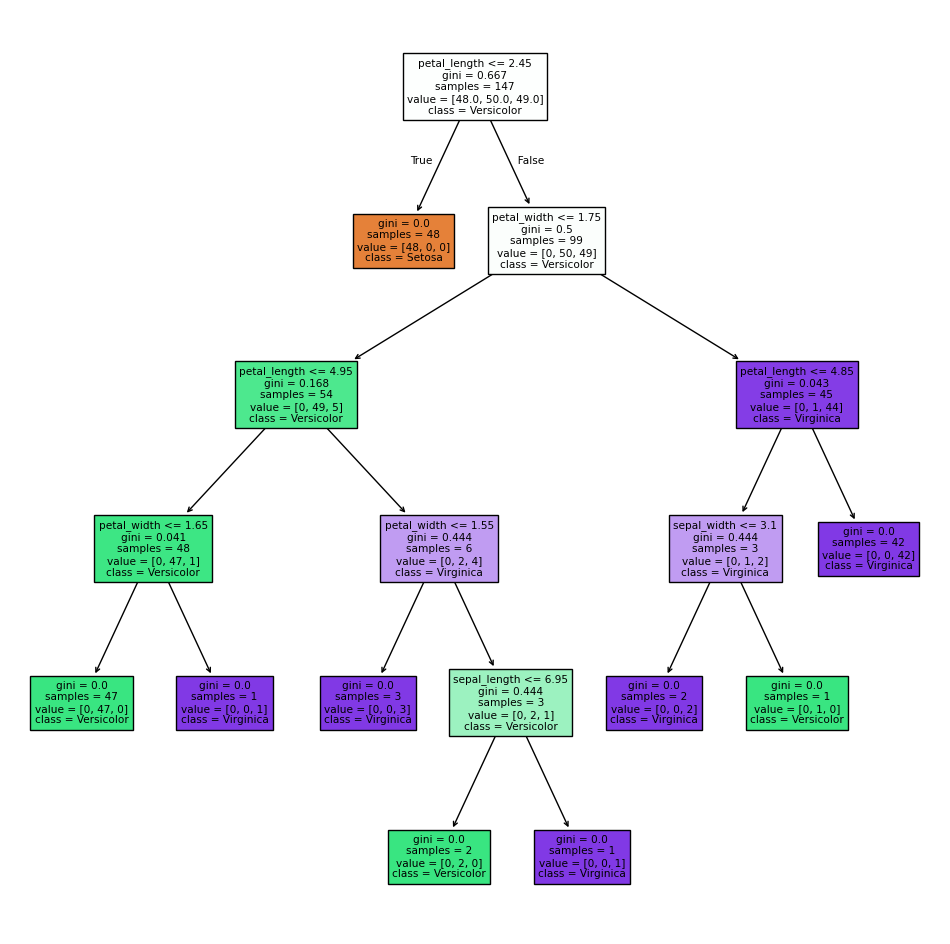

In [ ]:
from sklearn import tree
from matplotlib import rcParams
rcParams['figure.figsize']=12,12
dt = tree.DecisionTreeClassifier()
dt.fit(X,y)
tree.plot_tree(dt,
               class_names=['Setosa','Versicolor','Virginica'],
               feature_names=['sepal_length','sepal_width','petal_length','petal_width'],
              filled=True,max_depth=6)
plt.show()

In [ ]:
from collections import Counter
Counter(data.target)

Counter({0: 48, 1: 50, 2: 49})

In [ ]:
data.target.value_counts()

,count
target,
1,50
2,49
0,48


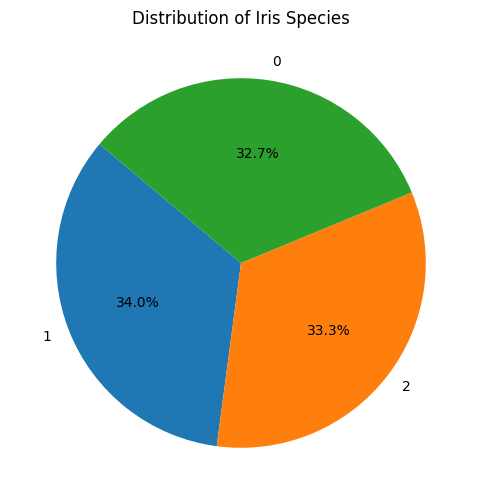

In [ ]:
# Pie Chart for target distribution
target_counts = data['target'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Iris Species')
plt.show()


RANDOMxFOREST!


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
df=pd.read_csv('/content/mtcars.csv')
df.head()

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['car_model'] = le.fit_transform(df['car_model'])

In [ ]:
df.head()

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,16,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,17,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,4,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,12,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,4,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
